<a href="https://colab.research.google.com/github/alfonharyos/dts_porto/blob/main/telco_churn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/courses/binar/ch_2/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/courses/binar/ch_2/test.csv')

## Data Identification

In [ ]:
df_train.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
col_numeric=df_train.select_dtypes(exclude=[object]).columns.tolist()
print(col_numeric)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [ ]:
print(df_train.keys())
print(df_train.shape)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')
(4250, 20)


In [ ]:
print(df_train.churn.value_counts())


no     3652
yes     598
Name: churn, dtype: int64


In [ ]:
df_test.head(2)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.7,0


In [ ]:
print(df_test.keys())
print(df_test.shape)

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')
(750, 20)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
#descriptive info numerical
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
list_train_cat=df_train.select_dtypes(include=[object]).columns.tolist()
print(list_train_cat)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [ ]:
# categori setiap fitur
df_train[list_train_cat].nunique().sort_values()

international_plan     2
voice_mail_plan        2
churn                  2
area_code              3
state                 51
dtype: int64

## EDA

In [ ]:
import plotly.express as px

In [ ]:
# Gambaran umum percentase Churn rate
fig = px.pie(df_train.churn, values=df_train.churn.value_counts().values, 
             names=['not-churn','churn'],
             title="Churn Rate")
fig.show()

### EDA categorical

In [ ]:
fig1= px.histogram(df_train[['churn','international_plan']], 
                   x='international_plan', 
                   color='churn', text_auto=True,
                   title="international_plan (churn/not-churn)")

fig2= px.histogram(df_train[['churn','voice_mail_plan']], 
                   x='voice_mail_plan', 
                   color='churn', text_auto=True,
                   title="voice_mail_plan (churn/not-churn)")

fig3= px.histogram(df_train[['churn','area_code']], 
                   x='area_code', 
                   color='churn', text_auto=True,
                   title="area_code (churn/not-churn)")

fig1.show()
fig2.show()
fig3.show()

### EDA Numerical

In [ ]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


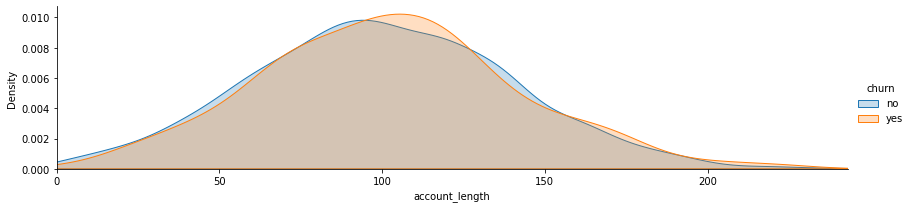

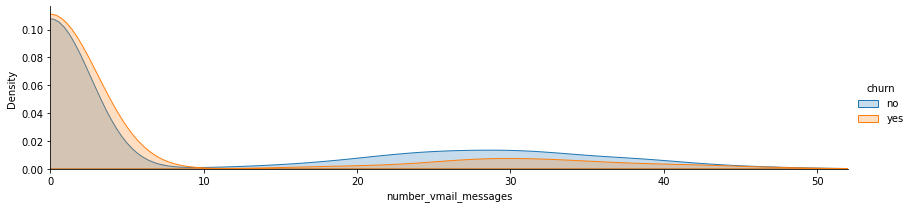

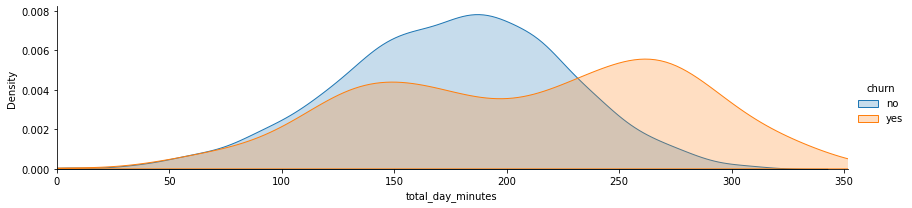

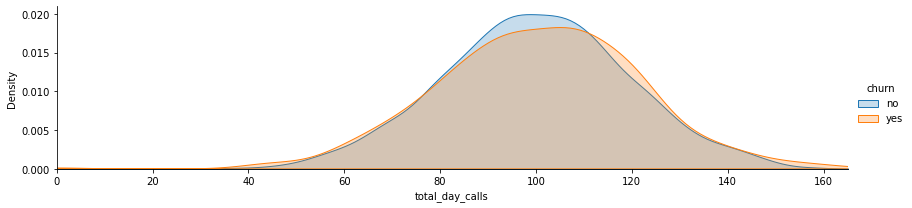

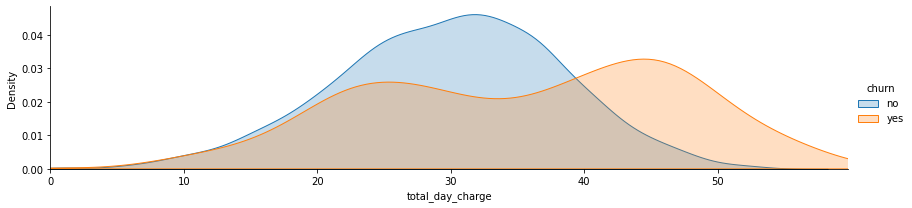

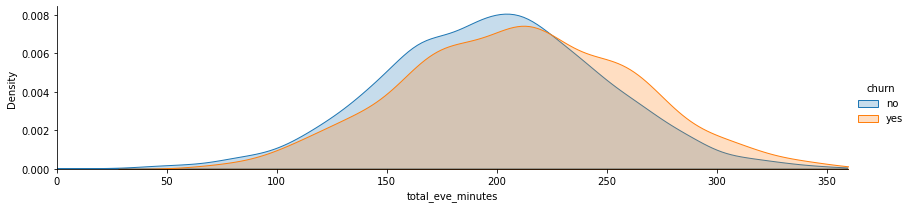

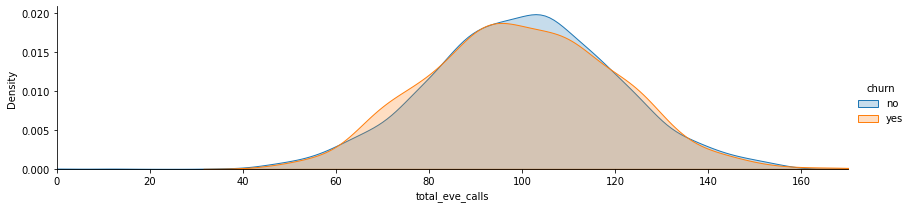

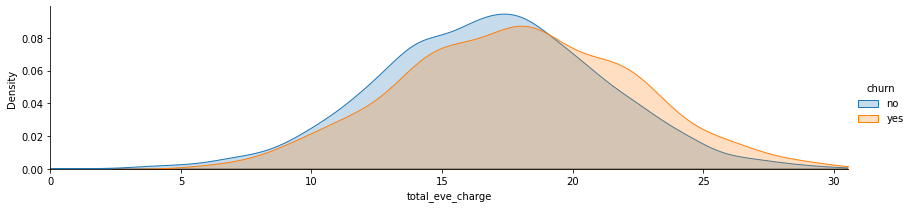

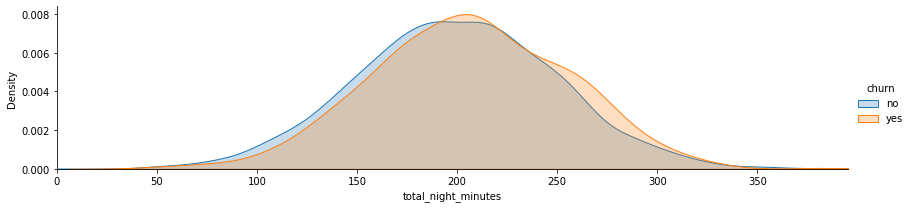

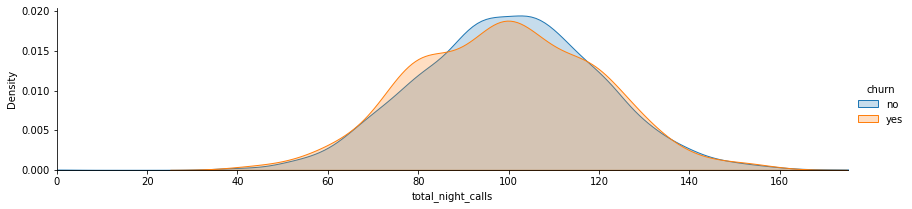

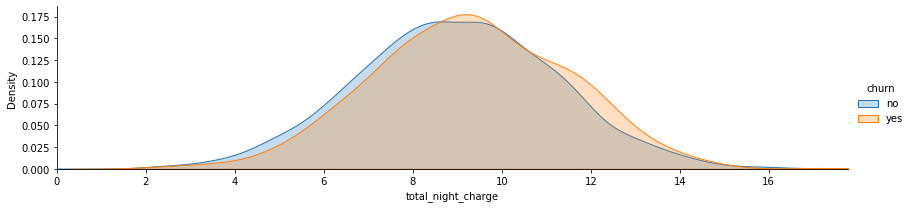

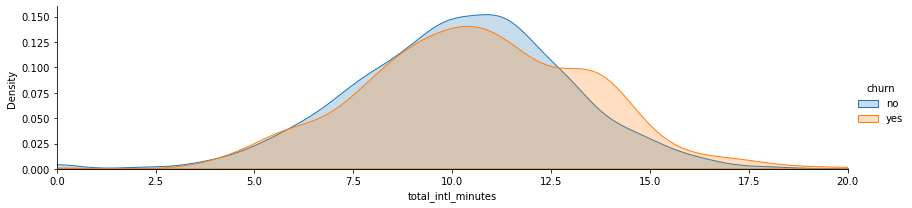

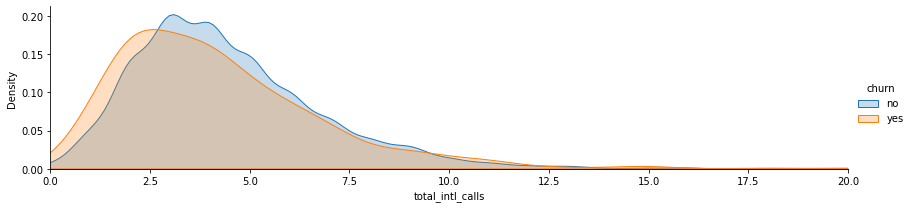

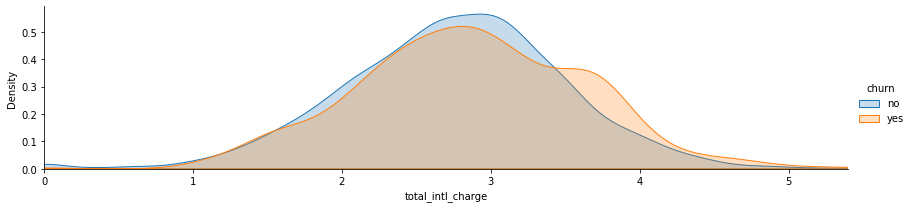

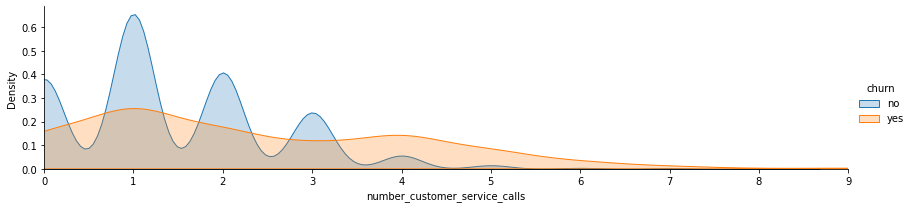

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_kde_num(col_name):
    return sns.FacetGrid(df_train, hue="churn",aspect=4)\
              .map(sns.kdeplot,col_name,shade= True)\
              .set(xlim=(0, df_train[col_name].max()))\
              .add_legend()

for col_name in col_numeric:
    show_kde_num(col_name)
    plt.show()

#### visualisasi lama panggialan (menit)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='yes'].total_day_minutes, name='total_day_minutes'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='yes'].total_eve_minutes, name='total_eve_minutes'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='yes'].total_night_minutes, name='total_night_minutes'))

# Overlay both histograms
fig.update_layout(
    title_text='total minutes (day, eve, night)', # title of plot
    xaxis_title_text='total_minutes', # xaxis label
    yaxis_title_text='Count', # yaxis label
    barmode='overlay'
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='no'].total_day_minutes, name='total_day_minutes'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='no'].total_eve_minutes, name='total_eve_minutes'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='no'].total_night_minutes, name='total_night_minutes'))

# Overlay both histograms
fig.update_layout(
    title_text='total minutes (day, eve, night)', # title of plot
    xaxis_title_text='total_minutes', # xaxis label
    yaxis_title_text='Count', # yaxis label
    barmode='overlay'
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### visualisasi banyaknya panggilan per periode waktu

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='yes'].total_day_calls, name='total_day_calls'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='yes'].total_eve_calls, name='total_eve_calls'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='yes'].total_night_calls, name='total_night_calls'))

# Overlay both histograms
fig.update_layout(
    title_text='total calls (day, eve, night)', # title of plot
    xaxis_title_text='total_calls', # xaxis label
    yaxis_title_text='Count', # yaxis label
    barmode='overlay'
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='no'].total_day_calls, name='total_day_calls'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='no'].total_eve_calls, name='total_eve_calls'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='no'].total_night_calls, name='total_night_calls'))

# Overlay both histograms
fig.update_layout(
    title_text='total calls (day, eve, night)', # title of plot
    xaxis_title_text='total_calls', # xaxis label
    yaxis_title_text='Count', # yaxis label
    barmode='overlay'
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### visualisasi total charge per periode waktu

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='yes'].total_day_charge, name='total_day_charge'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='yes'].total_eve_charge, name='total_eve_charge'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='yes'].total_night_charge, name='total_night_charge'))

# Overlay both histograms
fig.update_layout(
    title_text='total charge (day, eve, night)', # title of plot
    xaxis_title_text='total_charge', # xaxis label
    yaxis_title_text='Count', # yaxis label
    barmode='overlay'
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='no'].total_day_charge, name='total_day_charge'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='no'].total_eve_charge, name='total_eve_charge'))
fig.add_trace(go.Histogram(x=df_train.loc[df_train.churn=='no'].total_night_charge, name='total_night_charge'))

# Overlay both histograms
fig.update_layout(
    title_text='total charge (day, eve, night)', # title of plot
    xaxis_title_text='total_charge', # xaxis label
    yaxis_title_text='Count', # yaxis label
    barmode='overlay'
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

## Preprocessing

### Outlier

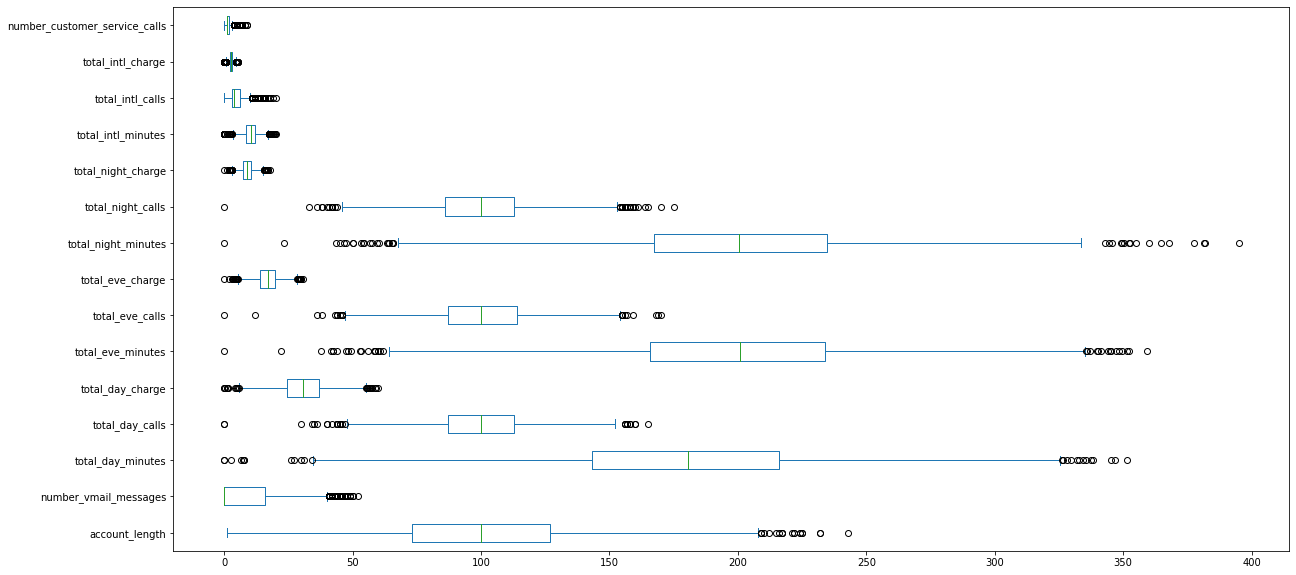

In [ ]:
df_train.plot(kind='box', rot=0, figsize=(20,10), vert=False)

In [ ]:
from scipy import stats
import numpy as np


In [ ]:
filtered_entries = np.array([True] * len(df_train))
for col in col_numeric:
	zscore = abs(stats.zscore(df_train[col]))
	filtered_entries = (zscore < 3) & filtered_entries

df_train_clean = df_train[filtered_entries]
print(df_train[col_numeric].shape, df_train_clean.shape)

(4250, 15) (4031, 20)


In [ ]:
df_train_clean

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,AZ,97,area_code_510,no,no,0,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,8.8,5,2.38,1,yes
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no


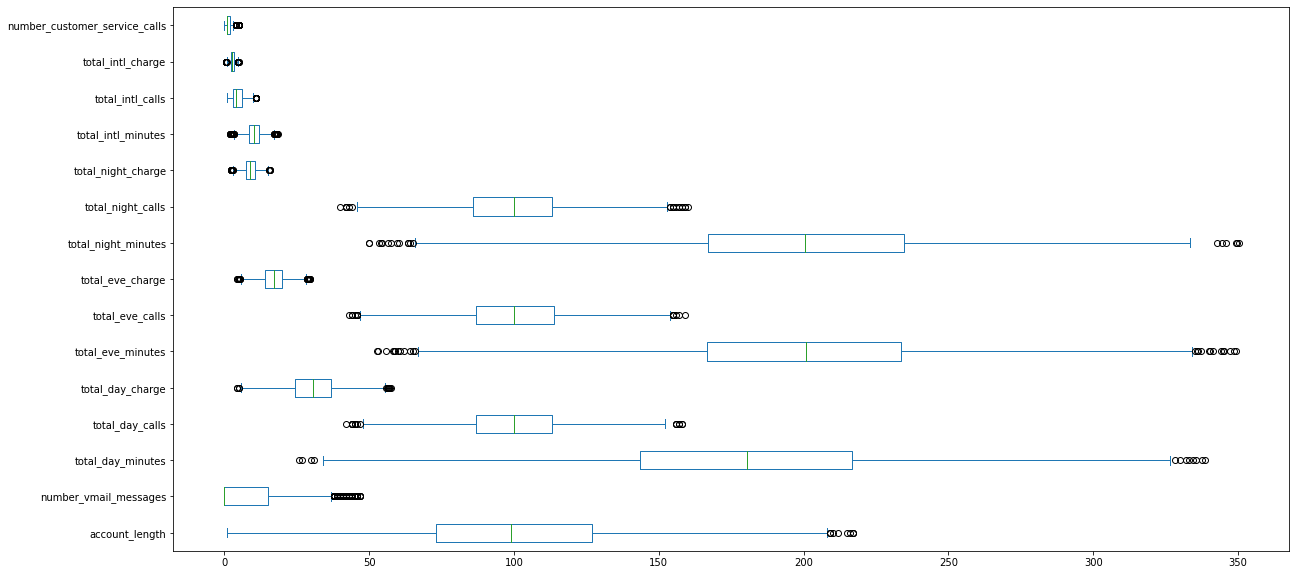

In [ ]:
df_train_clean.plot(kind='box', rot=0, figsize=(20,10), vert=False)

### Feature Engineering 

In [ ]:
# categorical feature
# yes & no to 1 & 0
df_train_clean['voice_mail_plan'] = df_train_clean['voice_mail_plan']\
                                      .map({'yes': 1, 'no': 0}) 
df_train_clean['international_plan'] = df_train_clean['international_plan']\
                                        .map({'yes': 1, 'no': 0}) 
df_train_clean['churn'] = df_train_clean['churn']\
                            .map({'yes': 1, 'no': 0}) 

# onehot area_code
df_train_clean = pd.get_dummies(data=df_train_clean, columns=['area_code'])


df_train_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,0,0,1,0
1,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,0,0,1,0
2,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,1,0,0
3,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,0,1,0
4,MA,121,0,1,24,218.2,88,37.09,348.5,108,...,118,9.57,7.5,7,2.03,3,0,0,0,1


In [ ]:
# numerical feature
df_train_clean['total_all_minutes'] = df_train_clean['total_day_minutes'] +\
                                      df_train_clean['total_eve_minutes'] +\
                                      df_train_clean['total_night_minutes']
df_train_clean['total_all_calls'] = df_train_clean['total_day_calls'] +\
                                    df_train_clean['total_eve_calls'] +\
                                    df_train_clean['total_night_calls']
df_train_clean['total_all_charge'] = df_train_clean['total_day_charge'] +\
                                     df_train_clean['total_eve_charge'] +\
                                     df_train_clean['total_night_charge']

In [ ]:
df_train_clean.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,total_all_minutes,total_all_calls,total_all_charge
0,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,3,3.70,1,0,0,1,0,611.5,329,55.54
1,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,5,3.29,0,0,0,1,0,527.2,328,59.00
2,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,7,1.78,2,0,1,0,0,558.2,248,65.02
3,OK,75,1,0,0,166.7,113,28.34,148.3,122,...,3,2.73,3,0,0,1,0,501.9,356,49.36
4,MA,121,0,1,24,218.2,88,37.09,348.5,108,...,7,2.03,3,0,0,0,1,779.3,314,76.28


In [ ]:
#drop columns
df_train_clean.drop(columns=[ 'state','total_day_charge', 'total_eve_charge','total_night_charge',
                              'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                              'total_eve_minutes', 'total_night_minutes'], inplace=True)
df_train_clean.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,total_all_minutes,total_all_calls,total_all_charge
0,107,0,1,26,13.7,3,3.70,1,0,0,1,0,611.5,329,55.54
1,137,0,0,0,12.2,5,3.29,0,0,0,1,0,527.2,328,59.00
2,84,1,0,0,6.6,7,1.78,2,0,1,0,0,558.2,248,65.02
3,75,1,0,0,10.1,3,2.73,3,0,0,1,0,501.9,356,49.36
4,121,0,1,24,7.5,7,2.03,3,0,0,0,1,779.3,314,76.28


In [ ]:
df_train_clean.shape

(4031, 15)

### feature selection

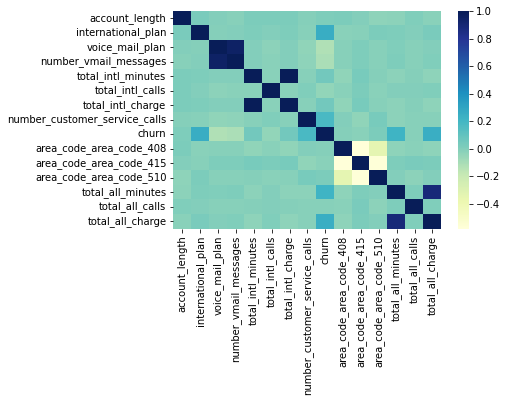

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dataplot = sns.heatmap(df_train_clean.corr(), cmap="YlGnBu", annot=False)
  
plt.show()

In [ ]:
len(df_train_clean[df_train_clean.voice_mail_plan==0]),len(df_train_clean[df_train_clean.number_vmail_messages==0])

(2988, 2989)

In [ ]:
#drop columns
df_train_clean.drop(columns=['number_vmail_messages'], inplace=True)
df_train_clean.shape

(4031, 14)

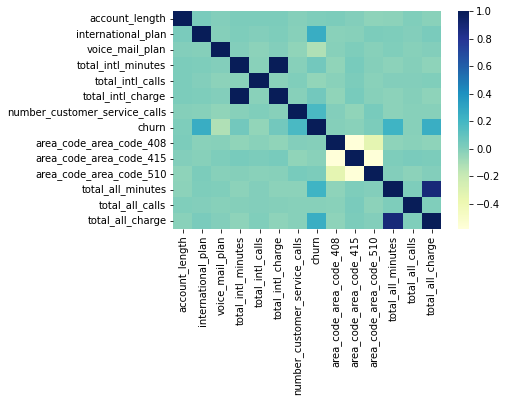

In [ ]:
dataplot = sns.heatmap(df_train_clean.corr(), cmap="YlGnBu", annot=False)
  
plt.show()

In [ ]:
df_train_clean.keys()

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'area_code_area_code_408',
       'area_code_area_code_415', 'area_code_area_code_510',
       'total_all_minutes', 'total_all_calls', 'total_all_charge'],
      dtype='object')

## Modelling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score


### split dataset 80:20

In [ ]:
train_data = df_train_clean.sample(frac=0.8, random_state=64)
test_data = df_train_clean.drop(train_data.index)

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 3225
No. of testing examples: 806


In [ ]:
X_train = train_data.drop('churn' , 1 )
y_train = train_data['churn'] 
X_test = test_data.drop('churn' , 1 )
y_test = test_data['churn'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((3225, 13), (3225,), (806, 13), (806,))

In [ ]:
y_train.value_counts()

0    2786
1     439
Name: churn, dtype: int64

In [ ]:
y_test.value_counts()

0    701
1    105
Name: churn, dtype: int64

In [ ]:
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(kernel='linear'),
}

In [ ]:
dict_non_f1= {}
dict_non_acc = {}
dict_non_model = {}

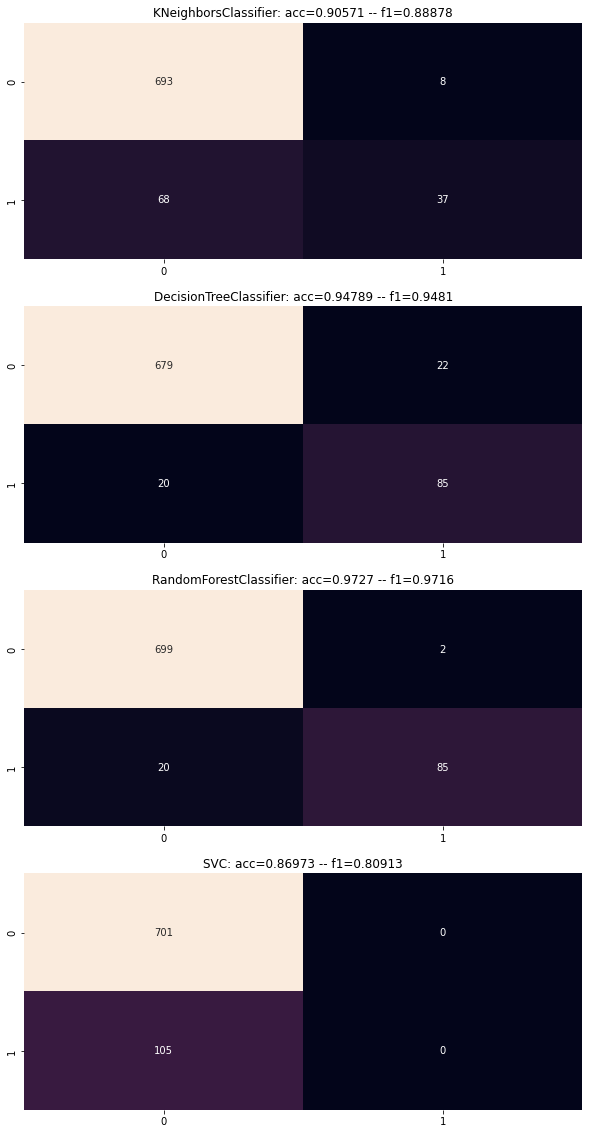

In [ ]:
fig, axs = plt.subplots(len(models), 1, figsize=(10, len(models)*5))
for model_name, i in zip(models, range(len(models))):
    # Load the model obj, fit, predict and calc mse
    model = models[model_name]
    # normalisasi data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model.fit(
        X_train_scaled, 
        y_train
    )
    y_pred=model.predict(X_test_scaled)
    f1=f1_score(y_test, y_pred, average='weighted')
    acc=accuracy_score(y_test, y_pred)

    # Load the result into the created dict
    dict_non_f1[model_name]=f1
    dict_non_acc[model_name]=acc
    dict_non_model[model_name]=model
    
    cm=confusion_matrix(y_test, y_pred)

    # Plot results
    axs[i].set_title(f'{model_name}: acc={np.round(acc, 5)} -- f1={np.round(f1, 5)}')
    sns.heatmap(ax=axs[i], data=cm, annot=True, fmt='g', cbar=False)
plt.show()

### Smote imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=5)
X_train_b, y_train_b = smote.fit_resample(X_train, y_train)
print(y_train_b.value_counts())

0    2786
1    2786
Name: churn, dtype: int64


In [ ]:
dict_b_f1= {}
dict_b_acc = {}
dict_b_model = {}

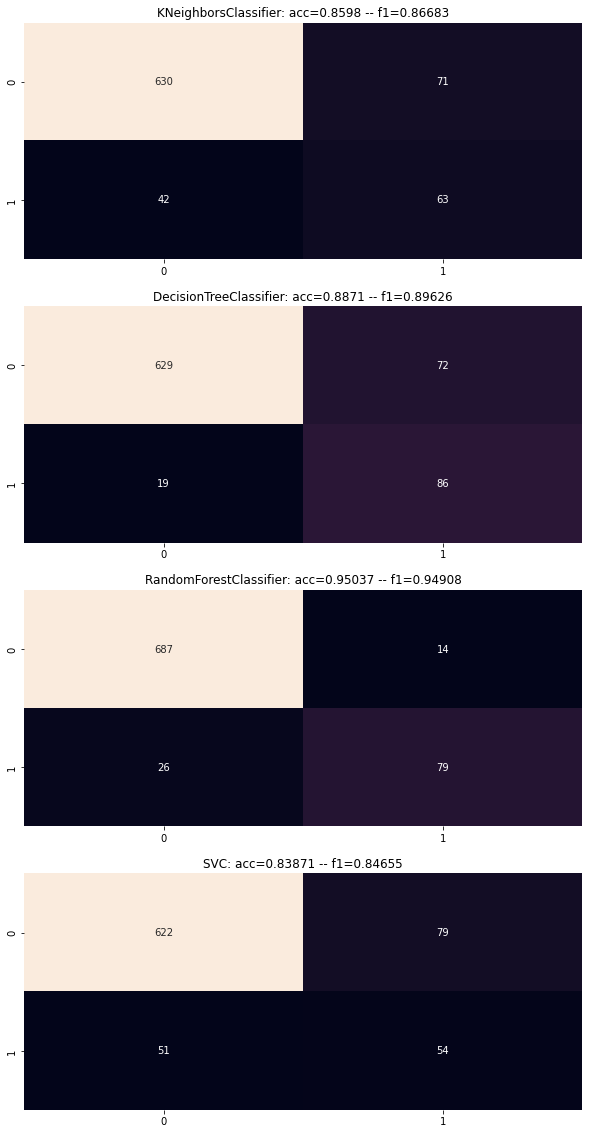

In [ ]:
fig, axs = plt.subplots(len(models), 1, figsize=(10, len(models)*5))
for model_name, i in zip(models, range(len(models))):
    # Load the model obj, fit, predict and calc mse
    model = models[model_name]
    # normalisasi data
    scaler = MinMaxScaler()
    X_train_b_scaled = scaler.fit_transform(X_train_b)
    X_test_scaled = scaler.transform(X_test)
    model.fit(
        X_train_b_scaled, 
        y_train_b
    )
    y_test_b=y_test
    y_pred_b=model.predict(X_test_scaled)
    f1=f1_score(y_test_b, y_pred_b, average='weighted')
    acc=accuracy_score(y_test_b, y_pred_b)

    # Load the result into the created dict
    dict_b_f1[model_name]=f1
    dict_b_acc[model_name]=acc
    dict_b_model[model_name]=model
    
    cm=confusion_matrix(y_test_b, y_pred_b)

    # Plot results
    axs[i].set_title(f'{model_name}: acc={np.round(acc, 5)} -- f1={np.round(f1, 5)}')
    sns.heatmap(ax=axs[i], data=cm, annot=True, fmt='g', cbar=False)
plt.show()

In [ ]:
param_grid = {
    'bootstrap': [True],
    'n_estimators': [10, 50, 100],
    'max_depth' : [5, 10, 100, 200]
}

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_gs = GridSearchCV(
    estimator=rf, 
    scoring='f1_weighted',
    param_grid=param_grid, 
    cv=KFold(n_splits=10), 
    verbose=2,  
    n_jobs=-1)
rf_gs.fit(X_train_b_scaled, y_train_b)
print(rf_gs.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'bootstrap': True, 'max_depth': 200, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       701
           1       0.85      0.75      0.80       105

    accuracy                           0.95       806
   macro avg       0.91      0.87      0.88       806
weighted avg       0.95      0.95      0.95       806

0.9503722084367245
0.9490789206534975


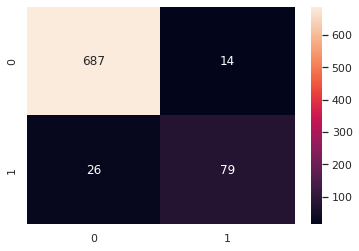

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

model_rf_b = rf_gs.best_estimator_
y_pred_b = model_rf_b.predict(scaler.transform(X_test))

# Evaluate the model
print(classification_report(y_test, y_pred_b))
print(model_rf_b.score(scaler.transform(X_test), y_test))
print(f1_score(y_test, y_pred_b, average='weighted'))
cm_b=confusion_matrix(y_test, y_pred_b)
df_cm = pd.DataFrame(cm_b)
sns.set(font_scale=1) 
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt="g")

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_b_scaled = scaler.fit_transform(X_train_b)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_nn_b = Sequential()
model_nn_b.add(Dense(128, input_dim=X_train_b_scaled.shape[1], activation='relu')),
model_nn_b.add(Dense(512, activation='relu')),
model_nn_b.add(Dropout(0.2)),
model_nn_b.add(Dense(1, activation='sigmoid')),

model_nn_b.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_nn_b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1792      
                                                                 
 dense_7 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 68,353
Trainable params: 68,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', 
                               monitor='val_accuracy', patience = 13, 
                               restore_best_weights=True)
callbacks = [early_stopping]

In [ ]:
history_b = model_nn_b.fit(X_train_b_scaled, y_train_b, 
                    validation_data=(X_test_scaled, y_test),
                    epochs=50, verbose=2, callbacks=[callbacks])

Epoch 1/50
175/175 - 1s - loss: 0.4203 - accuracy: 0.7979 - val_loss: 0.3850 - val_accuracy: 0.8462 - 1s/epoch - 8ms/step
Epoch 2/50
175/175 - 1s - loss: 0.3464 - accuracy: 0.8347 - val_loss: 0.3374 - val_accuracy: 0.8747 - 637ms/epoch - 4ms/step
Epoch 3/50
175/175 - 1s - loss: 0.3163 - accuracy: 0.8636 - val_loss: 0.4335 - val_accuracy: 0.8077 - 694ms/epoch - 4ms/step
Epoch 4/50
175/175 - 1s - loss: 0.2930 - accuracy: 0.8778 - val_loss: 0.2994 - val_accuracy: 0.8933 - 949ms/epoch - 5ms/step
Epoch 5/50
175/175 - 1s - loss: 0.2819 - accuracy: 0.8841 - val_loss: 0.3633 - val_accuracy: 0.8623 - 1s/epoch - 7ms/step
Epoch 6/50
175/175 - 1s - loss: 0.2800 - accuracy: 0.8824 - val_loss: 0.2410 - val_accuracy: 0.9132 - 1s/epoch - 7ms/step
Epoch 7/50
175/175 - 1s - loss: 0.2680 - accuracy: 0.8927 - val_loss: 0.2712 - val_accuracy: 0.9144 - 1s/epoch - 6ms/step
Epoch 8/50
175/175 - 1s - loss: 0.2623 - accuracy: 0.8925 - val_loss: 0.2986 - val_accuracy: 0.9132 - 657ms/epoch - 4ms/step
Epoch 9/50
1

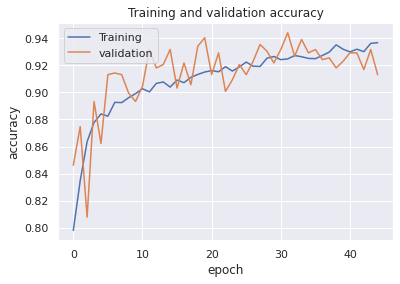

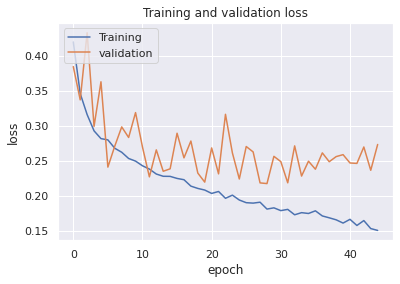

In [ ]:
# summarize history for accuracy
plt.plot(history_b.history['accuracy'])
plt.plot(history_b.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_b.history['loss'])
plt.plot(history_b.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu')),
model_nn.add(Dense(512, activation='relu')),
model_nn.add(Dropout(0.2)),
model_nn.add(Dense(1, activation='sigmoid')),

model_nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1792      
                                                                 
 dense_10 (Dense)            (None, 512)               66048     
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 68,353
Trainable params: 68,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='val_accuracy', patience = 13, restore_best_weights=True)
callbacks = [early_stopping]

In [ ]:
history = model_nn.fit(X_train_scaled, y_train, 
                    validation_data=(X_test_scaled, y_test),
                    epochs=50, verbose=2, callbacks=[callbacks])

Epoch 1/50
101/101 - 1s - loss: 0.3885 - accuracy: 0.8530 - val_loss: 0.3147 - val_accuracy: 0.8772 - 1s/epoch - 11ms/step
Epoch 2/50
101/101 - 0s - loss: 0.3210 - accuracy: 0.8713 - val_loss: 0.2931 - val_accuracy: 0.8784 - 431ms/epoch - 4ms/step
Epoch 3/50
101/101 - 0s - loss: 0.2973 - accuracy: 0.8778 - val_loss: 0.2707 - val_accuracy: 0.8995 - 442ms/epoch - 4ms/step
Epoch 4/50
101/101 - 0s - loss: 0.2737 - accuracy: 0.8881 - val_loss: 0.2526 - val_accuracy: 0.8970 - 422ms/epoch - 4ms/step
Epoch 5/50
101/101 - 0s - loss: 0.2581 - accuracy: 0.9023 - val_loss: 0.2273 - val_accuracy: 0.9169 - 409ms/epoch - 4ms/step
Epoch 6/50
101/101 - 0s - loss: 0.2323 - accuracy: 0.9116 - val_loss: 0.2225 - val_accuracy: 0.9069 - 399ms/epoch - 4ms/step
Epoch 7/50
101/101 - 0s - loss: 0.2235 - accuracy: 0.9219 - val_loss: 0.2095 - val_accuracy: 0.9181 - 426ms/epoch - 4ms/step
Epoch 8/50
101/101 - 0s - loss: 0.2203 - accuracy: 0.9228 - val_loss: 0.2071 - val_accuracy: 0.9280 - 431ms/epoch - 4ms/step
Ep

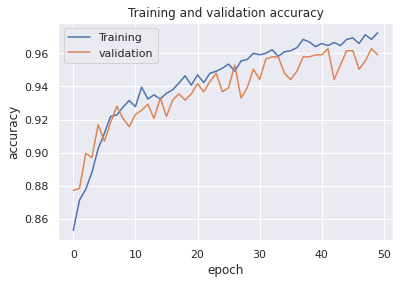

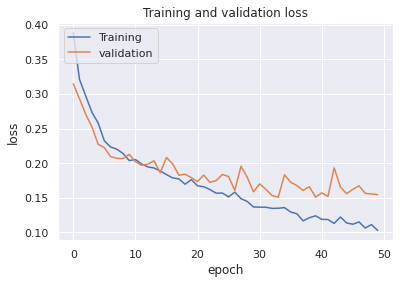

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'validation'], loc='upper left')
plt.show()

#### nn_smote

26/26 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       701
           1       0.83      0.71      0.77       105

    accuracy                           0.94       806
   macro avg       0.90      0.85      0.87       806
weighted avg       0.94      0.94      0.94       806

0.9368270039558411


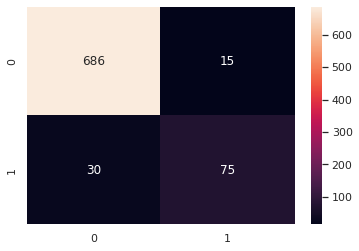

In [ ]:
y_pred_b = model_nn_b.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, pd.Series(y_pred_b.reshape(-1)).round()))
best_score = max(history_b.history['accuracy'])
print(best_score)
cm_b=confusion_matrix(y_test, pd.Series(y_pred_b.reshape(-1)).round())
df_cm = pd.DataFrame(cm_b)
sns.set(font_scale=1) 
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt="g")

#### nn_wo_smote

26/26 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       701
           1       0.92      0.75      0.83       105

    accuracy                           0.96       806
   macro avg       0.94      0.87      0.90       806
weighted avg       0.96      0.96      0.96       806

0.9724031090736389


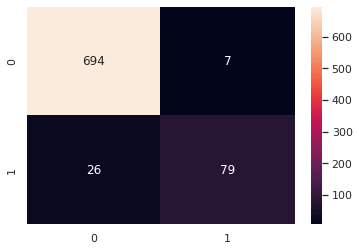

In [ ]:
y_pred = model_nn.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, pd.Series(y_pred.reshape(-1)).round()))
best_score = max(history.history['accuracy'])
print(best_score)
cm=confusion_matrix(y_test, pd.Series(y_pred.reshape(-1)).round())
df_cm = pd.DataFrame(cm)
sns.set(font_scale=1) 
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt="g")